# Deep Learning: Ex.4 - ConvNets

Submitted by: [Maxim Gromov ID: 317225332]


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from seaborn import heatmap 

print(tf.__version__)

2.5.0


### Load the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time.. (in case of server error - just try again a bit later)

train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


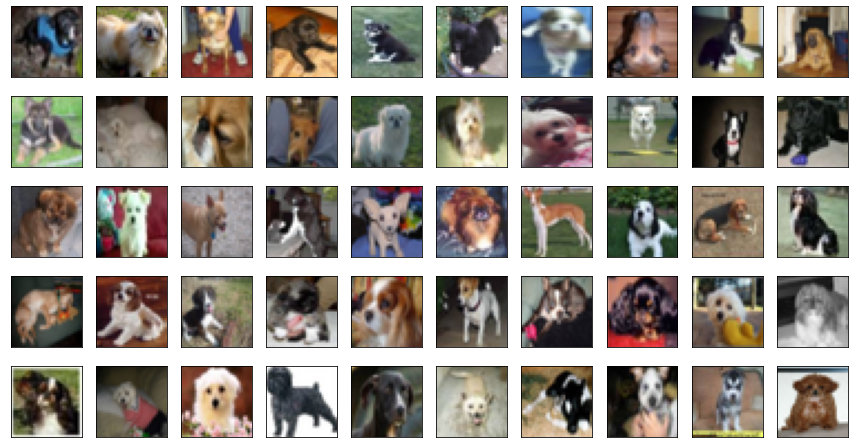

In [ ]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)

# 6. lets plot some 'dogs'
[idx] = np.where(train_labels==5) # find all the dogs
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_images[idx[i]])
    plt.xticks([]), plt.yticks([])

*** 
General instructions:

- For each model, the input layer is the images (after flatten it to long vector), and the output layer is a `softmax` of 10 units (one unit for each class).

- Display the `model.summary()` for each model.

- Train each model for **50 epochs** (use: `batch_size=64` and `verbose=0`).

- For each model, **plot the training and testing: loss and accuracy**.

- Summarize the results of all models (for both datasets) in the table below (by editing this markup cell):


<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>train accuracy</th>
    <th>test accuracy</th>
  </tr>
    
  <!-- copy this block once for every model/dataset you tested -->  
  <tr> 
    <td>0-hidden</td>   <!-- Model -->
    <td>30,730</td> <!-- #parameters -->
    <td>0.36</td> <!-- train accuracy -->
    <td>0.42</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>Simple ConvNet</td>   <!-- Model -->
    <td>3,278,806</td> <!-- #parameters -->
    <td>0.55</td> <!-- train accuracy -->
    <td>0.96</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>Deeper ConvNet</td>   <!-- Model -->
    <td>356,810</td> <!-- #parameters -->
    <td>0.6</td> <!-- train accuracy -->
    <td>0.94</td> <!-- test accuracy -->
  </tr>  
  <tr> 
    <td>Dropout</td>   <!-- Model -->
    <td>356,810</td> <!-- #parameters -->
    <td>0.67</td> <!-- train accuracy -->
    <td>0.69</td> <!-- test accuracy -->
  </tr>  
</table>

---




***
### 1. No hidden layers

Just connect all inputs directly to the output layer (always remember to add a `Flatten` layer before using a `Dense` layer)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
0.42574000358581543
0.3610999882221222


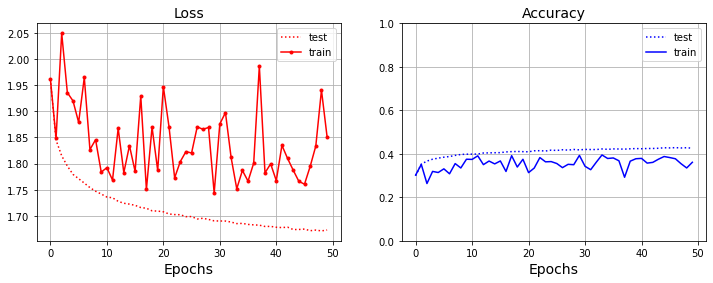

In [ ]:
model = Sequential() 
model.add(Flatten(input_shape=(32, 32,3))) 
model.add(Dense(10, activation='softmax')) 

model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64
                    , verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

***
### 2. Simple ConvNet

Use 32 kernels (3x3, Conv2D), followed by additional 100-Dense layer.


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               3276900   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 3,278,806
Trainable params: 3,278,806
Non-trainable params: 0
_________________________________________________________________
0.9627599716186523
0.5501000285148621


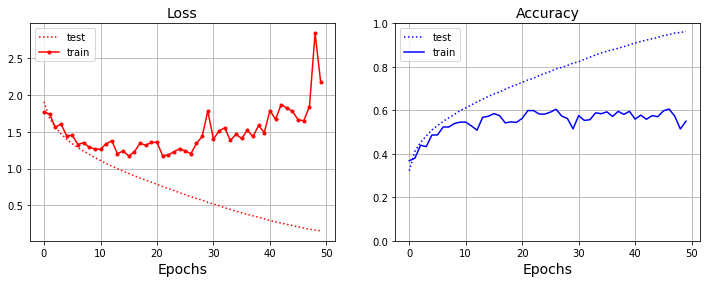

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32,32,3)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

***
### 3. Deeper ConvNet

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128-`Dense`

Use `padding='same'` in the Conv2D layers.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)             

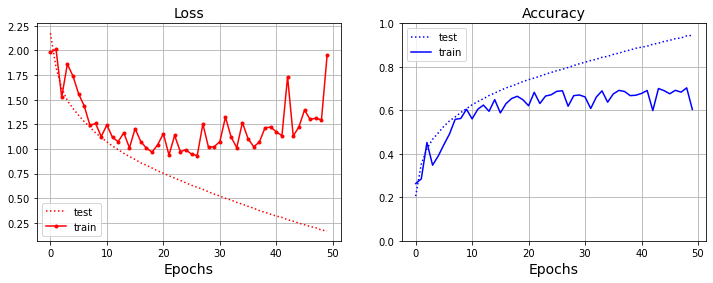

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

***
### 4. Add "Dropout"

Use the previous model architecture. Add a `Dropout(0.2)` layer, after each and every of the `MaxPooling` layers. Add `Dropout(0.5)` layer between the two dense layers.

**The purpose of the "dropout" layers is to reduce overfitting.**

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)        

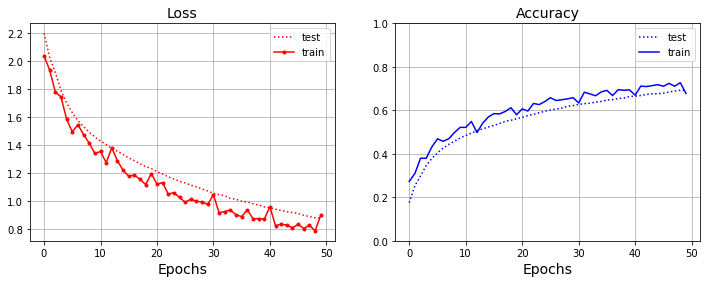

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'.-r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend({'train','test'})
plt.grid()
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

***
### 5. Confusion matrix

Plot the confusion matrix for the last model.

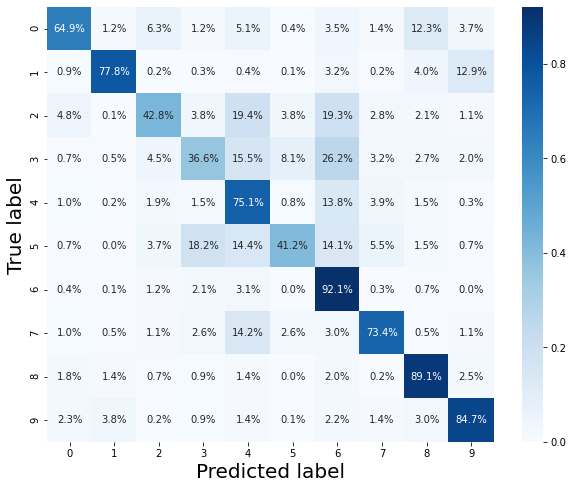

In [ ]:
y_hat = model.predict(test_images)
y_hat = np.argmax(y_hat, axis=1)
CM = confusion_matrix(test_labels, y_hat)
CM = CM / CM.sum(axis=1)

plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.1%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()